### One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [2]:
# import the data set, split it into two dataframes

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3-Copy1.csv')
num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(exclude=[np.number])

In [3]:
# let's have a look at which categories I can label

cat_df.describe()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689
unique,4,2,3,5,59,2,5,2,3,3,3,9,4,4,6,3
top,west region,no,basic,bachelor,1/27/11,jan,employed,f,suburban,married,personal auto,personal l3,offer1,agent,four-door car,medsize
freq,3678,9316,6523,3210,236,5684,6658,5469,6742,6199,7937,4006,4394,4019,5424,7528


In [4]:
# let's drop effective to date column

cat_df = cat_df.drop('effective_to_date', axis=1)

In [5]:
# labeling the ordinal category 'coverage'

cat_df.replace({'basic': 0, 'extended' : 1, 'premium' : 2}, inplace=True)

In [6]:
# labeling the ordinal category 'education'

cat_df.replace({'high school or below': 0, 'college' : 1, 'bachelor' : 2, 'master' : 3, 'doctor':4}, inplace=True)

In [7]:
# labeling the ordinal category 'renew_offer_type'

cat_df.replace({'offer1': 1, 'offer2' : 2, 'offer3' : 3, 'offer4' : 4}, inplace=True)


In [8]:
# labeling the ordinal category 'vehicle_size'

cat_df.replace({'small': 0, 'medsize' : 1, 'large' : 2}, inplace=True)


In [9]:
# now lets get dummies for all the other nominal categories:

cat_df_dummified = pd.get_dummies(cat_df, drop_first=True)


### Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has noticeably large skew (slanted with respect to the mean). For example, you might select customer_lifetime_value as a candidate varB which has skew.



array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

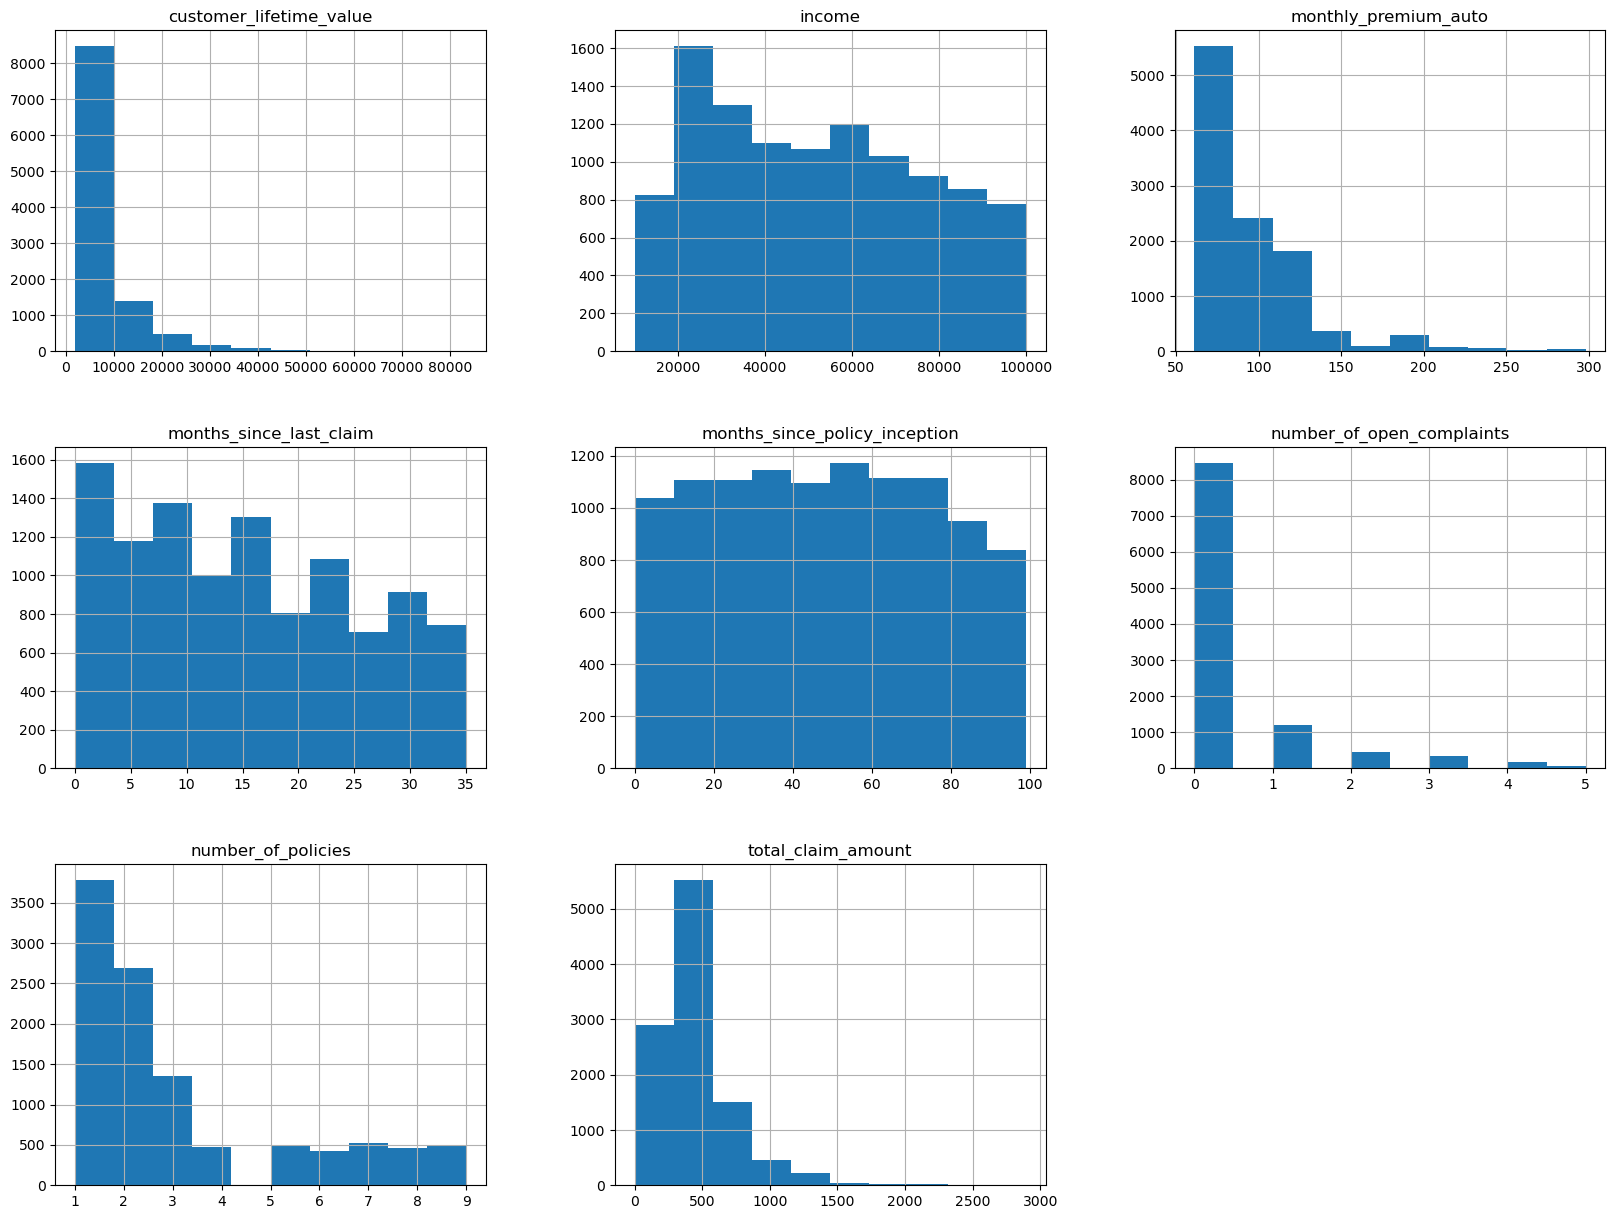

In [10]:
# Use Matplotlib to construct histograms

num_df.hist(figsize = (20,15))

In [11]:
varA = num_df['months_since_policy_inception']
varB = num_df['customer_lifetime_value']

In [12]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

#### varA
Use minmax transform to bring varA's values into the range [0,1].
Check that varA has been rescaled using a distplot or a histagram

In [13]:
scaled_varA = minmax_scale(varA)

<AxesSubplot:ylabel='Count'>

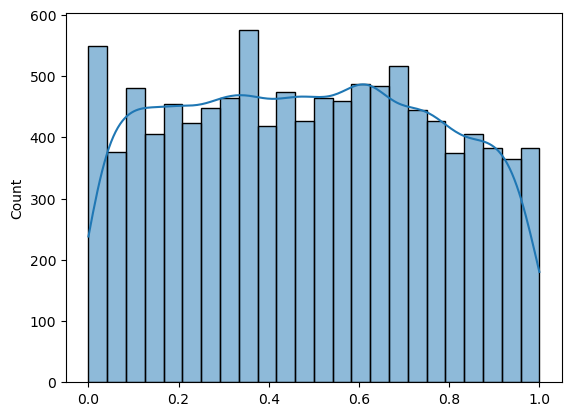

In [14]:
sns.histplot(data=num_df, x=scaled_varA, kde=True)

#### varB
Use StandardScalar or PowerTransform to reduce the skew and standardize varB's distribution.

In [15]:
pt = PowerTransformer(method = 'box-cox')

pt.fit(varB.array.reshape(-1, 1))

scaled_varB = pd.Series(pt.transform(varB.array.reshape(-1, 1)).flatten())


<AxesSubplot:ylabel='Count'>

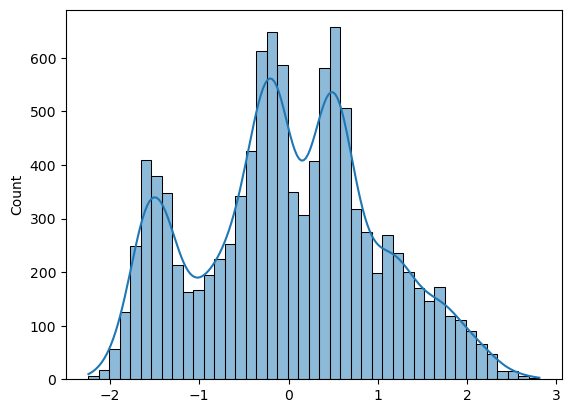

In [16]:
sns.histplot(data=num_df, x=scaled_varB, kde=True)

#### Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [17]:
m = np.mean(scaled_varB)

round(m)

0

In [18]:
np.std(scaled_varB)

0.999999999999997

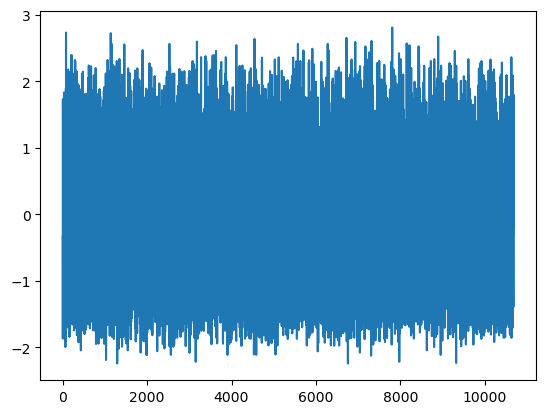

In [19]:
plt.plot(scaled_varB)


# Tuesday

## Linear Regression

X-y split (y is the target variable, which is the total claim amount)

Train-test split.

Standardize the data (after the data split).

Apply linear regression.

Model Interpretation.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [21]:
#X-y split (y is the target variable, which is the total claim amount)

X = num_df.drop('total_claim_amount', axis=1)
y = df.total_claim_amount

In [22]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
9877,21423,22379,65,9,31,0,2
10069,8391,40211,106,5,98,2,6
10317,3969,49544,101,3,29,0,1


In [23]:
# Standardize the data (after the data split).

pt = StandardScaler()

X_train_scaled = pd.DataFrame(pt.fit_transform(X_train))
X_test_scaled = pd.DataFrame(pt.transform(X_test))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

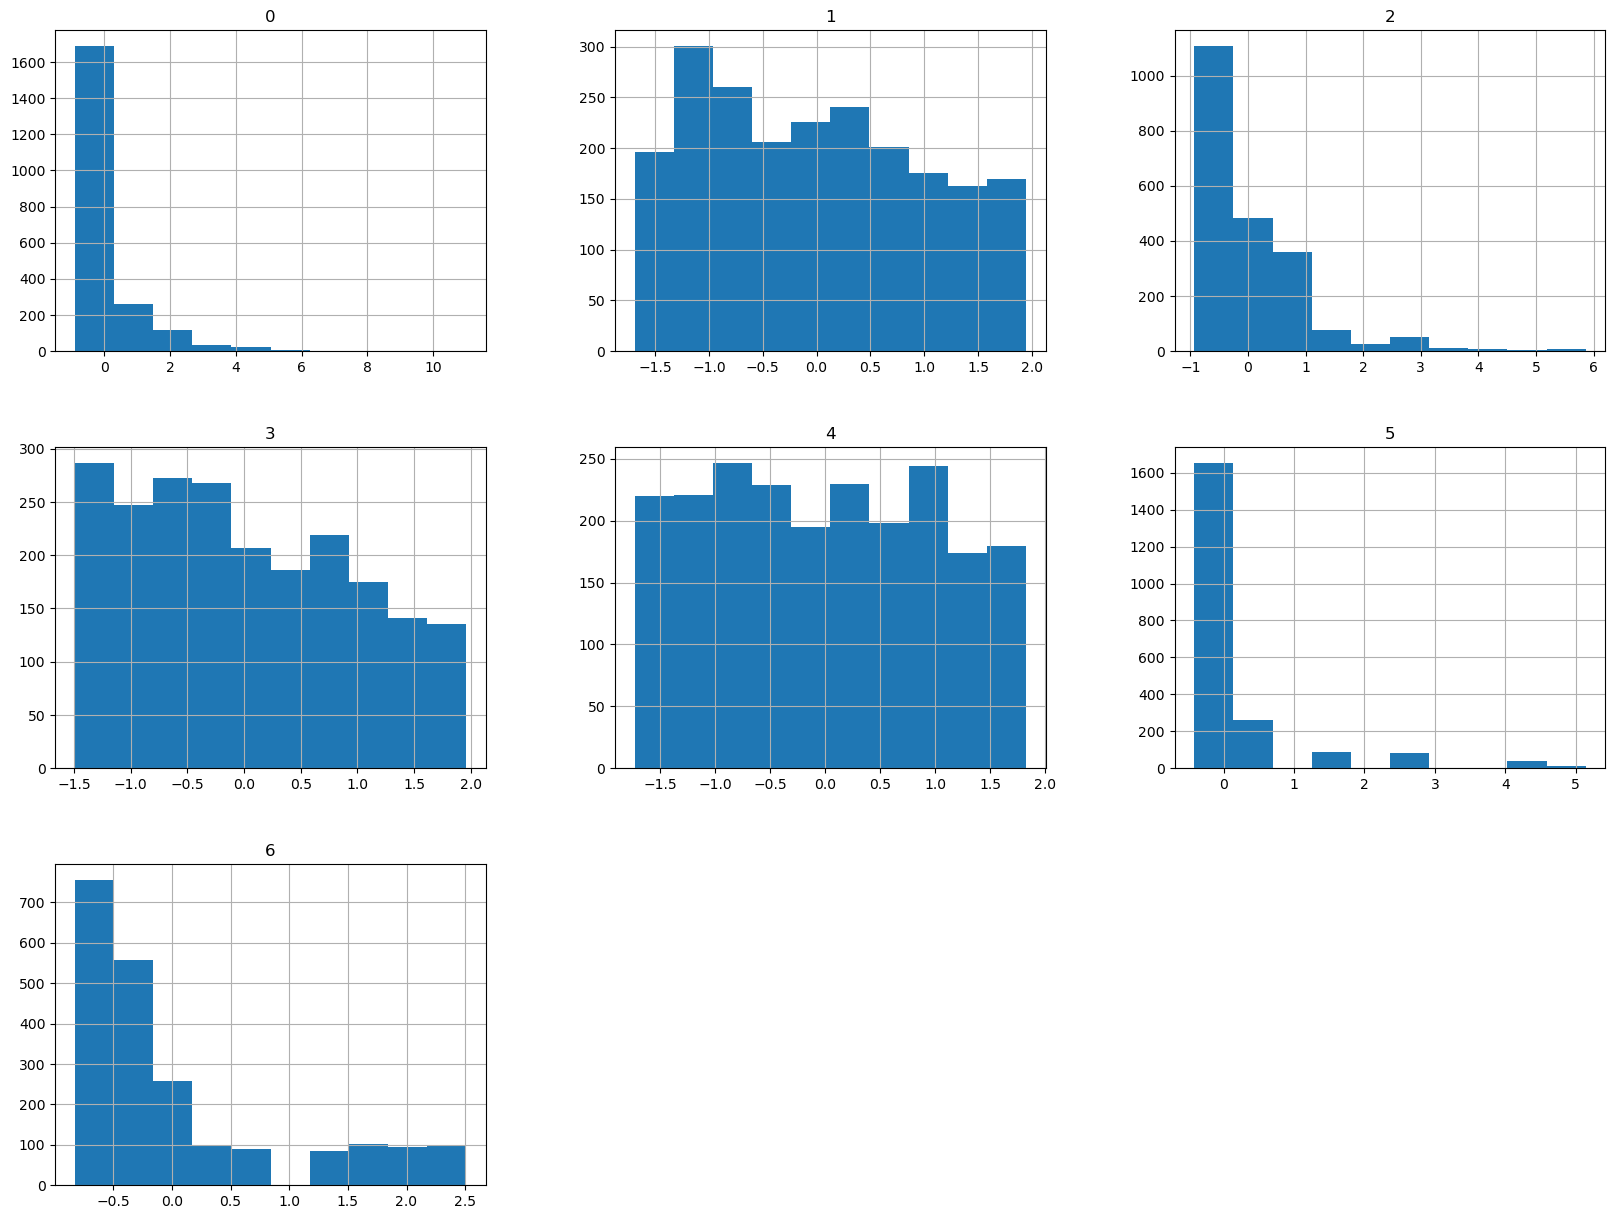

In [24]:
X_test_scaled.hist(figsize = (20,15))

In [25]:
# Apply linear regression

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [26]:
# Model prediction

y_pred = model.predict(X_test_scaled)     

y_pred_train= model.predict(X_train_scaled)

y_pred_train

array([304.37051971, 515.51823651, 482.11397016, ..., 331.03480538,
       456.96468117, 457.94233729])

In [27]:
# Model Interpretation

print('the coefficients are: ',model.coef_)

print('model intercept is at: ',model.intercept_)

the coefficients are:  [-7.44374050e+00 -3.35677864e+01  1.88742534e+02  1.27912773e-01
 -3.00331832e+00  2.86638652e-01  2.40707525e+00]
model intercept is at:  432.7827154718746


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='total_claim_amount'>

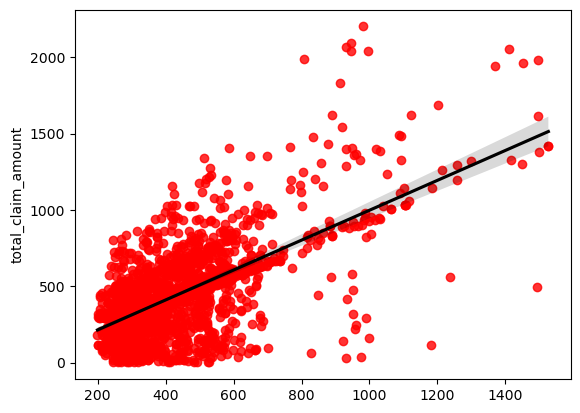

In [28]:
yp_ = y_pred
yt_ = y_test
sns.regplot(yp_,yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})

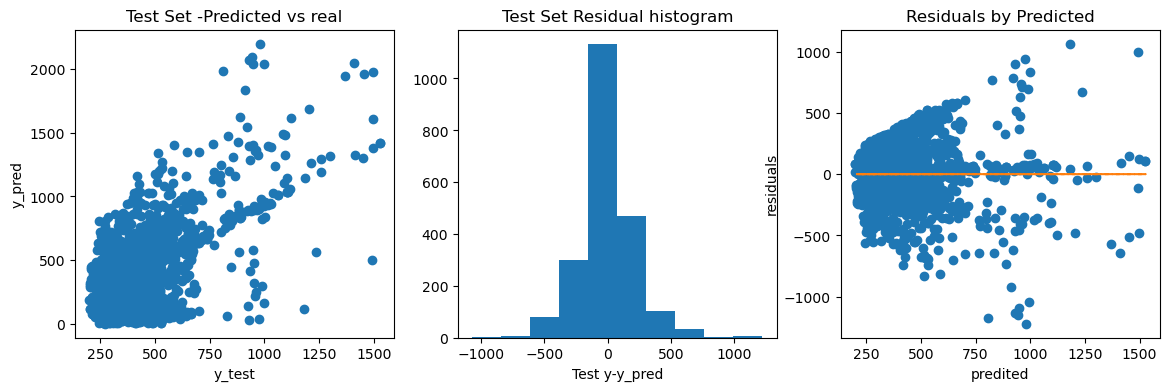

In [29]:
result=pd.DataFrame({"y_test": list(y_test),"y_pred": list(y_pred)})

# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_pred-y_test,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

# Wednesday

## Model Validation

### Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.

In [30]:
import math

In [31]:
##evaluating the train set

print ('Predictions on the Train set are the following: ')
print('MSE: ',mse(y_train,y_pred_train))
print('RMSE: ',math.sqrt(mse(y_train,y_pred_train)))
print('MAE: ',mae(y_train,y_pred_train))
print('R2:', r2_score(y_train,y_pred_train))


Predictions on the Train set are the following: 
MSE:  51002.752009727075
RMSE:  225.8378887824784
MAE:  153.54238059437057
R2: 0.411514336844104


In [32]:
##prediction on the test set

print ('Predictions on the Test set are the following: ')
print('MSE: ',mse(y_test,y_pred))
print('RMSE: ',math.sqrt(mse(y_test,y_pred)))
print('MAE: ',mae(y_test,y_pred))
print('R2:', r2_score(y_test,y_pred))




Predictions on the Test set are the following: 
MSE:  48603.25525355552
RMSE:  220.4614597918546
MAE:  150.17517808486429
R2: 0.40127309153524027


In [33]:
# Adjusted R2

R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-(r2_score(y_test,y_pred)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R2 is: ',Adj_R2)

Adjusted R2 is:  0.3993054444182199


#### Feature Importance


In [34]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,188.742534
1,income,33.567786
0,customer_lifetime_value,7.443740
4,months_since_policy_inception,3.003318
6,number_of_policies,2.407075
5,number_of_open_complaints,0.286639
3,months_since_last_claim,0.127913


## Model Iteration (Wednesday and Thursday)

#### Please rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).

In [35]:
df2 = pd.concat([cat_df_dummified,
               num_df],axis=1)

In [36]:
#X-y split (y is the target variable, which is the total claim amount)

X = df2.drop('total_claim_amount', axis=1)
y = df2.total_claim_amount

In [37]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,coverage,education,renew_offer_type,vehicle_size,region_east,region_north west,region_west region,response_yes,month_jan,employment_status_employed,...,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
10237,1,1,2,1,0,0,0,0,0,0,...,0,0,0,8663,42169,83,18,90,1,2
2689,2,0,2,1,0,0,0,0,1,0,...,0,0,0,4213,12160,109,5,34,0,1
4489,0,2,1,1,0,1,0,1,1,0,...,0,0,0,2359,19864,63,22,96,0,1


In [38]:
# Standardize the data (after the data split).

pt = StandardScaler()

X_train_scaled = pd.DataFrame(pt.fit_transform(X_train))
X_test_scaled = pd.DataFrame(pt.transform(X_test))

In [39]:
# Apply linear regression

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [40]:
# Model prediction

y_pred = model.predict(X_test_scaled)     

y_pred_train= model.predict(X_train_scaled)


In [41]:
# Model Interpretation

print('the coefficients are: ',model.coef_)

print('model intercept is at: ',model.intercept_)

the coefficients are:  [-6.36053233e+00 -5.68887349e+00  2.92162250e+00 -1.00927193e-01
  3.93961331e-01 -1.44669701e+00  1.15371461e+00 -6.46757336e+00
  6.54437399e-01 -7.55363629e+00  2.74334700e+00 -3.75167950e+00
  3.15660892e+01  6.45802120e+00  1.84631087e+02  8.46674842e+01
 -1.34471538e-01  3.09513070e+01  7.59337341e+13 -2.71895375e+12
 -1.72037239e+00  1.04019716e+00 -5.98624319e+13 -7.31628301e+13
 -8.39026994e+13  1.17454182e+12  1.81013541e+12  1.71308267e+12
 -1.36799796e+00  9.49167683e-02 -4.22887516e-02 -4.26137004e-01
 -3.71504517e+00 -6.56493830e+00 -8.29155730e+00 -9.69125620e-01
  1.03430640e+00 -4.63904727e+00  1.82649203e+02  2.87603737e+00
 -1.62868745e+00 -1.08384414e+00  1.79868737e+00]
model intercept is at:  433.27589324885247


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='total_claim_amount'>

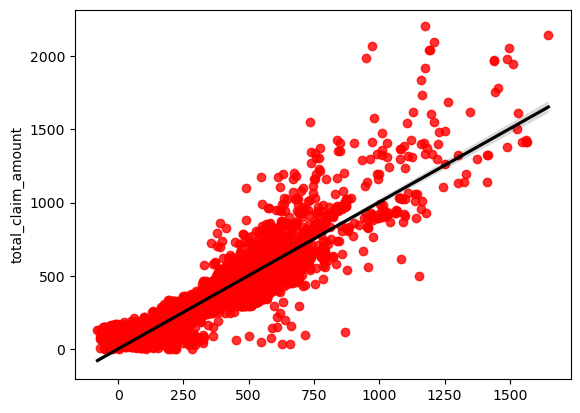

In [42]:
yp_ = y_pred
yt_ = y_test
sns.regplot(yp_,yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [43]:
##evaluating the train set

print ('Predictions on the Train set are the following: ')
print('MSE: ',mse(y_train,y_pred_train))
print('RMSE: ',math.sqrt(mse(y_train,y_pred_train)))
print('MAE: ',mae(y_train,y_pred_train))
print('R2:', r2_score(y_train,y_pred_train))


Predictions on the Train set are the following: 
MSE:  20354.680626730013
RMSE:  142.66983082183148
MAE:  97.32073430414613
R2: 0.7645798368982049


In [44]:
##prediction on the test set

print ('Predictions on the Test set are the following: ')
print('MSE: ',mse(y_test,y_pred))
print('RMSE: ',math.sqrt(mse(y_test,y_pred)))
print('MAE: ',mae(y_test,y_pred))
print('R2:', r2_score(y_test,y_pred))




Predictions on the Test set are the following: 
MSE:  18140.701506794387
RMSE:  134.68742148691683
MAE:  93.43082512270749
R2: 0.7827752419540044


In [45]:
# Adjusted R2

R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-(r2_score(y_test,y_pred)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R2 is: ',Adj_R2)

Adjusted R2 is:  0.7798221390150294


#### Feature Importance


In [46]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
24,policy_personal l3,8.390270e+13
18,policy_type_personal auto,7.593373e+13
23,policy_personal l2,7.316283e+13
22,policy_personal l1,5.986243e+13
19,policy_type_special auto,2.718954e+12
26,policy_special l2,1.810135e+12
27,policy_special l3,1.713083e+12
25,policy_special l1,1.174542e+12
14,location_code_suburban,1.846311e+02
38,monthly_premium_auto,1.826492e+02


In [47]:
df2.columns

Index(['coverage', 'education', 'renew_offer_type', 'vehicle_size',
       'region_east', 'region_north west', 'region_west region',
       'response_yes', 'month_jan', 'employment_status_employed',
       'employment_status_medical leave', 'employment_status_retired',
       'employment_status_unemployed', 'gender_m', 'location_code_suburban',
       'location_code_urban', 'marital_status_married',
       'marital_status_single', 'policy_type_personal auto',
       'policy_type_special auto', 'policy_corporate l2',
       'policy_corporate l3', 'policy_personal l1', 'policy_personal l2',
       'policy_personal l3', 'policy_special l1', 'policy_special l2',
       'policy_special l3', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury car', 'vehicle_class_luxury suv',
       'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 

In [48]:
df['policy'].unique()

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

#### (Optional) Please rerun the model after removing the outliers and compare the results using R2 metric.

In [49]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [50]:
number_of_open_complaints = num_df.number_of_open_complaints
num_df_treated = num_df.drop(['number_of_open_complaints'], axis=1)

In [51]:
num_df_treated = remove_outliers(num_df)

In [35]:
df2 = pd.concat([cat_df_dummified,
               num_df],axis=1)

In [36]:
#X-y split (y is the target variable, which is the total claim amount)

X = df2.drop('total_claim_amount', axis=1)
y = df2.total_claim_amount

In [52]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [37]:
#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,coverage,education,renew_offer_type,vehicle_size,region_east,region_north west,region_west region,response_yes,month_jan,employment_status_employed,...,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
10237,1,1,2,1,0,0,0,0,0,0,...,0,0,0,8663,42169,83,18,90,1,2
2689,2,0,2,1,0,0,0,0,1,0,...,0,0,0,4213,12160,109,5,34,0,1
4489,0,2,1,1,0,1,0,1,1,0,...,0,0,0,2359,19864,63,22,96,0,1


In [38]:
# Standardize the data (after the data split).

pt = StandardScaler()

X_train_scaled = pd.DataFrame(pt.fit_transform(X_train))
X_test_scaled = pd.DataFrame(pt.transform(X_test))

In [39]:
# Apply linear regression

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [40]:
# Model prediction

y_pred = model.predict(X_test_scaled)     

y_pred_train= model.predict(X_train_scaled)


In [41]:
# Model Interpretation

print('the coefficients are: ',model.coef_)

print('model intercept is at: ',model.intercept_)

the coefficients are:  [-6.36053233e+00 -5.68887349e+00  2.92162250e+00 -1.00927193e-01
  3.93961331e-01 -1.44669701e+00  1.15371461e+00 -6.46757336e+00
  6.54437399e-01 -7.55363629e+00  2.74334700e+00 -3.75167950e+00
  3.15660892e+01  6.45802120e+00  1.84631087e+02  8.46674842e+01
 -1.34471538e-01  3.09513070e+01  7.59337341e+13 -2.71895375e+12
 -1.72037239e+00  1.04019716e+00 -5.98624319e+13 -7.31628301e+13
 -8.39026994e+13  1.17454182e+12  1.81013541e+12  1.71308267e+12
 -1.36799796e+00  9.49167683e-02 -4.22887516e-02 -4.26137004e-01
 -3.71504517e+00 -6.56493830e+00 -8.29155730e+00 -9.69125620e-01
  1.03430640e+00 -4.63904727e+00  1.82649203e+02  2.87603737e+00
 -1.62868745e+00 -1.08384414e+00  1.79868737e+00]
model intercept is at:  433.27589324885247


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='total_claim_amount'>

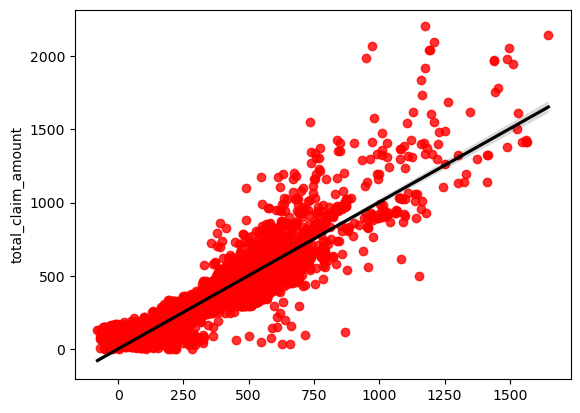

In [42]:
yp_ = y_pred
yt_ = y_test
sns.regplot(yp_,yt_,scatter_kws={"color": "red"}, line_kws={"color": "black"})

In [43]:
##evaluating the train set

print ('Predictions on the Train set are the following: ')
print('MSE: ',mse(y_train,y_pred_train))
print('RMSE: ',math.sqrt(mse(y_train,y_pred_train)))
print('MAE: ',mae(y_train,y_pred_train))
print('R2:', r2_score(y_train,y_pred_train))


Predictions on the Train set are the following: 
MSE:  20354.680626730013
RMSE:  142.66983082183148
MAE:  97.32073430414613
R2: 0.7645798368982049


In [44]:
##prediction on the test set

print ('Predictions on the Test set are the following: ')
print('MSE: ',mse(y_test,y_pred))
print('RMSE: ',math.sqrt(mse(y_test,y_pred)))
print('MAE: ',mae(y_test,y_pred))
print('R2:', r2_score(y_test,y_pred))




Predictions on the Test set are the following: 
MSE:  18140.701506794387
RMSE:  134.68742148691683
MAE:  93.43082512270749
R2: 0.7827752419540044


In [45]:
# Adjusted R2

R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-(r2_score(y_test,y_pred)))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R2 is: ',Adj_R2)

Adjusted R2 is:  0.7798221390150294


#### Feature Importance


In [46]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
24,policy_personal l3,8.390270e+13
18,policy_type_personal auto,7.593373e+13
23,policy_personal l2,7.316283e+13
22,policy_personal l1,5.986243e+13
19,policy_type_special auto,2.718954e+12
26,policy_special l2,1.810135e+12
27,policy_special l3,1.713083e+12
25,policy_special l1,1.174542e+12
14,location_code_suburban,1.846311e+02
38,monthly_premium_auto,1.826492e+02
